In [145]:
import torch
from pprint import pprint

psnr_log_file = "/home/shizun/experiment/20211028_EDSR_dynamic_match_x2_e300_ps192_lr0.0001_n32_i1_sTrue_b320_t50/psnr_log.pt"
base_log_file = "/home/shizun/experiment/20211028_EDSR_match_x2_e300_ps192_lr0.0001_n32_i1_sTrue_b320_t50/psnr_log.pt"

with open(psnr_log_file, 'rb') as _f:
    psnr_log = torch.load(_f)
with open(base_log_file, 'rb') as _f:
    base_log = torch.load(_f)


print(psnr_log.shape)
print(psnr_log)
print(base_log.shape)
print(base_log)

torch.Size([320, 1, 32])
tensor([[[46.2406, 47.4151, 47.4600,  ..., 47.7679, 47.7714, 47.7601]],

        [[44.3673, 44.9841, 45.0823,  ..., 45.7107, 45.7167, 45.7119]],

        [[43.8372, 44.6764, 44.8666,  ..., 45.8372, 45.8339, 45.8289]],

        ...,

        [[28.2871, 30.5432, 30.6739,  ..., 29.2545, 29.2268, 29.2324]],

        [[    nan,     nan,     nan,  ...,     nan,     nan,     nan]],

        [[27.8839, 29.9908, 30.1834,  ..., 29.0686, 29.0481, 29.0411]]])
torch.Size([320, 1, 32])
tensor([[[47.0847,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[45.4635,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[45.5547,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        ...,

        [[29.7732,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[    nan,     nan,     nan,  ...,     nan,     nan,     nan]],

        [[29.5153,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]])


In [146]:
new_base_log = base_log[:,:,0].reshape(-1,1).repeat(1,psnr_log.shape[-1])
print(new_base_log.shape)
print(new_base_log)

torch.Size([320, 32])
tensor([[47.0847, 47.0847, 47.0847,  ..., 47.0847, 47.0847, 47.0847],
        [45.4635, 45.4635, 45.4635,  ..., 45.4635, 45.4635, 45.4635],
        [45.5547, 45.5547, 45.5547,  ..., 45.5547, 45.5547, 45.5547],
        ...,
        [29.7732, 29.7732, 29.7732,  ..., 29.7732, 29.7732, 29.7732],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [29.5153, 29.5153, 29.5153,  ..., 29.5153, 29.5153, 29.5153]])


In [147]:
new_psnr_log = psnr_log.squeeze()
print(new_psnr_log.shape)
print(new_psnr_log)

torch.Size([320, 32])
tensor([[46.2406, 47.4151, 47.4600,  ..., 47.7679, 47.7714, 47.7601],
        [44.3673, 44.9841, 45.0823,  ..., 45.7107, 45.7167, 45.7119],
        [43.8372, 44.6764, 44.8666,  ..., 45.8372, 45.8339, 45.8289],
        ...,
        [28.2871, 30.5432, 30.6739,  ..., 29.2545, 29.2268, 29.2324],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [27.8839, 29.9908, 30.1834,  ..., 29.0686, 29.0481, 29.0411]])


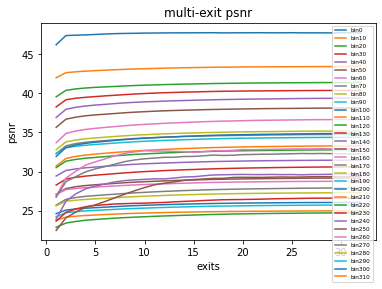

In [163]:
import matplotlib.pyplot as plt
import numpy as np
# plt.imshow(diff_bool, cmap='bwr', aspect='auto')
# plt.imshow(diff_bool, cmap='Reds', aspect='auto')
for bin_index in range(0,320,10):
    exits = np.arange(1,new_psnr_log.shape[-1]+1)
    plt.plot(exits, new_psnr_log[bin_index,:], label="bin{}".format(bin_index))
    plt.legend(loc='upper right', fontsize='xx-small')
    plt.title("multi-exit psnr") 
    plt.xlabel('exits')
    plt.ylabel('psnr')
    save_fig_name = psnr_log_file.split('/')[-2]
plt.savefig("temp/multi-exit_psnr_bins10_{}.png".format(save_fig_name),dpi=300)

In [ ]:
diff_log = new_psnr_log - new_base_log
print(diff_log.shape)
print(diff_log)

In [ ]:
diff_bool = diff_log > 0
print(diff_bool.shape)
print(diff_bool)

In [ ]:
for i in range(20):
    print(diff_bool[i])

In [ ]:
import matplotlib.pyplot as plt
# plt.imshow(diff_bool, cmap='bwr', aspect='auto')
plt.imshow(diff_bool, cmap='Reds', aspect='auto')
plt.title("match map") 
plt.xlabel('exits')
plt.ylabel('bins')
save_fig_name = psnr_log_file.split('/')[-2]
plt.savefig("temp/match_{}.png".format(save_fig_name),dpi=300)